In [1]:
import cv2
import numpy as np
from PIL import Image
import scipy.misc as sm

In [2]:
from keras.models import Sequential,Graph
from keras.layers.core import Activation,Flatten, Dense, Dropout,Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as kp
from keras.models import model_from_json

Using Theano backend.
DEBUG: nvcc STDOUT mod.cu
   ��������� ���������� C:/Users/������/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.10-64/tmpwysdjc/265abc51f7c376c224983485238ff1a5.lib � ������ C:/Users/������/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.10-64/tmpwysdjc/265abc51f7c376c224983485238ff1a5.exp

Using gpu device 0: GeForce GT 740M (CNMeM is enabled with initial size: 70.0% of memory, cuDNN 5005)


In [3]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
import theano
#theano.config.openmp = True # Only for CPU
print(theano.config.device)
from os import listdir

gpu0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 """#положительные прецеденты
file = open('gt.txt','r')
l = [line.strip() for line in file]
path = r'FullIJCNN2013'
count=0
for im in l:
    description = im.split(';')
    p = path +'/'+ description[0]
    A = plt.imread(p)
    B = A[int(description[2]):int(description[4]),int(description[1]):int(description[3])]
    I = Image.fromarray(B)
    p='nn'+'/'+str(count)+'.jpg'
    I.save(p)
    count+=1
"""

In [ ]:
pths = "Final_Test\Images"
paths = listdir(pths)
count=0
for pp in paths:    
    path_in_dir = 'Final_Test\Images'+'/'+pp
    pathss = listdir(path_in_dir)
    for p in pathss:
        if p.find('.csv') == -1:
            ps = path_in_dir+'/'+ p
            A = plt.imread(ps)
            I = Image.fromarray(A)
            ps='Final_Test'+'/'+str(count)+'.jpg'
            I.save(ps)
            count+=1


In [ ]:
pths = "FullIJCNN2013"
paths = listdir(pths)
count=0   

for p in paths:
    path_in_dir = 'FullIJCNN2013/'+p
    A = plt.imread(path_in_dir)
    I = Image.fromarray(A)
    #A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
    ps='FullIJCNN2013_jpg/'+str(count)+'.jpg'
    I.save(ps)
    count+=1

In [ ]:
import csv

pths = "Final_Test\Images"
paths = listdir(pths)
count=0
substr = '.csv'
for pp in paths:    
    path_in_dir = 'Final_Test\Images'+'/'+pp
    pathss = listdir(path_in_dir)
    for p in pathss:
        if substr in p:
            with open(path_in_dir+'/'+ p,'rb') as csvfile:
                spamreader = csv.reader(csvfile, dialect='excel')
                c = 0
                for row in spamreader:
                    if c ==0:
                        c+=1
                    else:
                        s = row[0].split(';')
                        ps = path_in_dir+'/'+ s[0]
                        A = plt.imread(ps)
                        B = A[int(s[4]):int(s[6]),int(s[3]):int(s[5])]
                        I = Image.fromarray(B)
                        ps='Final_Test/cut/'+str(count)+'.jpg'
                        I.save(ps)
                        count+=1

In [ ]:
import csv

pths = "Final_Test\Images"
paths = listdir(pths)
count=0
substr = '.csv'
for p in paths:
    if substr in p:
        with open(pths+'/'+ p,'rb') as csvfile:
            spamreader = csv.reader(csvfile, dialect='excel')
            c = 0
            for row in spamreader:
                if c ==0:
                    c+=1
                else:
                    s = row[0].split(';')
                    ps = pths+'/'+ s[0]
                    A = plt.imread(ps)
                    B = A[int(s[4]):int(s[6]),int(s[3]):int(s[5])]
                    I = Image.fromarray(B)
                    ps='Final_Test/cut/'+str(count)+'.jpg'
                    I.save(ps)
                    count+=1

In [ ]:
"""отрицательные прецеденты
import random
file = open('gt.txt','r')
l = [line.strip() for line in file]
l[:10]
path = r'FullIJCNN2013'
count=0
for im in l:
    a = random.randint(16,64)
    description = im.split(';')
    p = path +'/'+ description[0]
    A = plt.imread(p)
    B = A[int(description[4]):int(description[4])+a,int(description[3]):int(description[3])+a]
    I = Image.fromarray(B)
    p='nn'+'/'+str(count)+'.jpg'
    I.save(p)
    count+=1
    B = A[int(description[4]):int(description[4])+a,int(description[1]):int(description[1])+a]
    I = Image.fromarray(B)
    p='nn'+'/'+str(count)+'.jpg'
    I.save(p)
    count+=1
"""

In [5]:
img_size = 32
img_kernel = 3

In [ ]:
"""model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(3,img_size,img_size)))
model.add(Convolution2D(32,img_kernel , img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(32, img_kernel, img_kernel, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, img_kernel, img_kernel, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, img_kernel, img_kernel, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, img_kernel, img_kernel, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, img_kernel, img_kernel, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, img_kernel, img_kernel, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))"""

In [6]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',input_shape=(3, img_size, img_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer = SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [8]:
train_data_dir = 'data_train'
validation_data_dir = 'data_test'

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        )

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary')


Found 27015 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'negativ': 0, 'znaki': 1}

In [13]:
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary')

Found 21948 images belonging to 2 classes.


In [14]:
validation_generator.class_indices

{'negativ': 0, 'znaki': 1}

In [15]:
model.load_weights("znaki_new1.h5")

In [16]:
# fine-tune the model
history = model.fit_generator(
        train_generator,
        samples_per_epoch=27015,
        nb_epoch=100,
        validation_data=validation_generator,
        nb_val_samples=7500,
        verbose=1)

Epoch 1/100
27015/27015 [==============================] - 823s - loss: 0.1861 - acc: 0.9501 - val_loss: 0.0643 - val_acc: 0.9785
Epoch 2/100
27015/27015 [==============================] - 182s - loss: 0.1686 - acc: 0.9501 - val_loss: 0.0425 - val_acc: 0.9879
Epoch 3/100
27015/27015 [==============================] - 196s - loss: 0.1564 - acc: 0.9520 - val_loss: 0.0476 - val_acc: 0.9854
Epoch 4/100
27015/27015 [==============================] - 37s - loss: 0.1486 - acc: 0.9544 - val_loss: 0.0460 - val_acc: 0.9866
Epoch 5/100
27015/27015 [==============================] - 37s - loss: 0.1426 - acc: 0.9558 - val_loss: 0.0423 - val_acc: 0.9879
Epoch 6/100
27015/27015 [==============================] - 37s - loss: 0.1367 - acc: 0.9572 - val_loss: 0.0452 - val_acc: 0.9862
Epoch 7/100
27015/27015 [==============================] - 31s - loss: 0.1413 - acc: 0.9540 - val_loss: 0.0588 - val_acc: 0.9791
Epoch 8/100
27015/27015 [==============================] - 31s - loss: 0.1341 - acc: 0.9574 - 

In [17]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


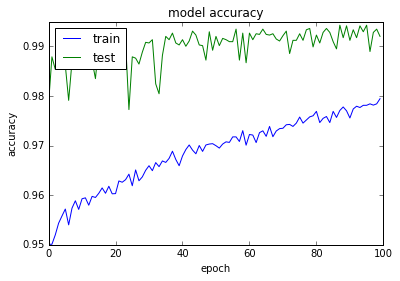

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

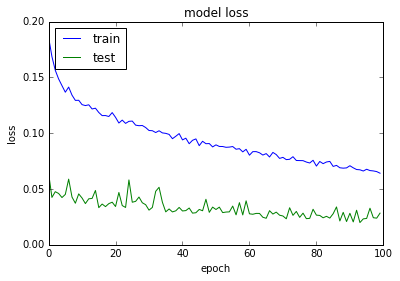

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [20]:
model.save_weights('znaki_new2.h5')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("znaki_new1.h5")
print("Loaded model from disk")
p = "data_test/negativ"
p = p.strip()
List = os.listdir(p)
c = 42
for l in List:
    p = 'data_test/negativ/'+l
    fil = kp.load_img(p)
    im = fil.resize((32,32))
    im = kp.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    predict = model.predict_classes(im)
    if predict[0][0]==1:
        c+=1
        A = plt.imread(p)
        I = Image.fromarray(A)        
        p='nn/n'+'/'+str(c)+'.jpg'
        I.save(p)
print c


Loaded model from disk
1/1 [==============================] - 0s

In [ ]:
print c